In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
NUM_TRIALS=10000
EPS=0.1
BANDIT_PROBABILITIES=[0.2,.5,.75]

In [18]:
class Bandit:
    def __init__(self,p):
        # p: the win rate
        self.p = p
        self.p_estimate= 0
        self.N=0

    def pull(self):
        # draw a 1 with probability p
        return np.random.random() <self.p 
    
    def update(self,x):
        self.N+=1
        self.p_estimate= ((self.N-1)* self.p_estimate+ x) / self.N

In [25]:
def experiment():
    bandits = [Bandit(p) for p in BANDIT_PROBABILITIES]

    rewards = np.zeros(NUM_TRIALS)
    num_times_explored = 0
    num_timex_exploited=0
    num_optimal = 0
    optimal_j = np.argmax([b.p for b in bandits])
    print("Optimal j: " , optimal_j)

    for i in range(NUM_TRIALS):
        #EPS = 1/(i+1) # decaying EPS
        #use_epsilon greedy to select the next bandit
        if np.random.random() <EPS:
            num_times_explored+=1
            j=np.random.randint(0,len(bandits))
        else:
            num_timex_exploited+=1
            j= np.argmax([b.p for b in bandits])

        if j==optimal_j:
            num_optimal+=1

        #pull the arm for the bandit with the largest sample
        x = bandits[j].pull()

        #update rewards log
        rewards[i] = x

        #update the distribution for the bandit whose arm we just pulled
        bandits[j].update(x)

    for b in bandits:
        print("mean estimate:", b.p_estimate)


    #print total reward
    print("Total reward earned:", rewards.sum())
    print("Overall win rate", rewards.sum()/ NUM_TRIALS)
    print("num of time explored",num_times_explored)
    print("num of time exploited",num_timex_exploited)
    print("num of times selected optimal bandit: ", num_optimal)


    #plot the results

    cumulative_rewards = np.cumsum(rewards)
    win_rates = cumulative_rewards/(np.arange(NUM_TRIALS)+1)
    plt.plot(win_rates)
    plt.plot(np.ones(NUM_TRIALS)* np.max(BANDIT_PROBABILITIES))
    plt.show()




Optimal j:  2
mean estimate: 0.22018348623853207
mean estimate: 0.5240793201133148
mean estimate: 0.7488197424892692
Total reward earned: 7236.0
Overall win rate 0.7236
num of time explored 1006
num of time exploited 8994
num of times selected optimal bandit:  9320


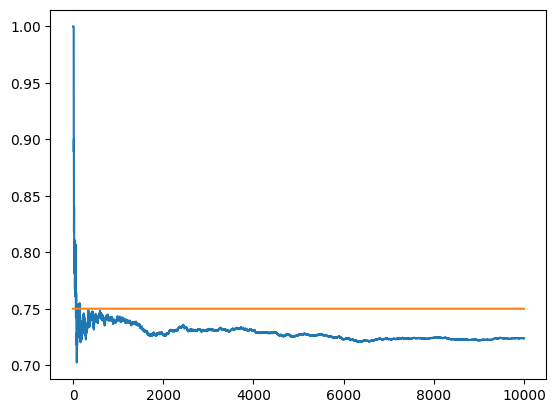

In [26]:
experiment()